<a href="https://colab.research.google.com/github/allisonribeirodf/alura-store-challenge/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [93]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja[ "loja"] = "Loja 01"
loja2["loja"] = "Loja 02"
loja3["loja"] = "Loja 03"
loja4["loja"] = "Loja 04"

df_all = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 01
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 01
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 01
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 01
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 01


#1. Análise do faturamento


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

faturamentos = {
    "Loja 01": loja["Preço"].sum(),
    "Loja 02": loja2["Preço"].sum(),
    "Loja 03": loja3["Preço"].sum(),
    "Loja 04": loja4["Preço"].sum()
}

for nome, valor in faturamentos.items():
    print(f"Faturamento {nome}: R$ {valor:,.2f}")


Faturamento Loja 01: R$ 1,534,509.12
Faturamento Loja 02: R$ 1,488,459.06
Faturamento Loja 03: R$ 1,464,025.03
Faturamento Loja 04: R$ 1,384,497.58


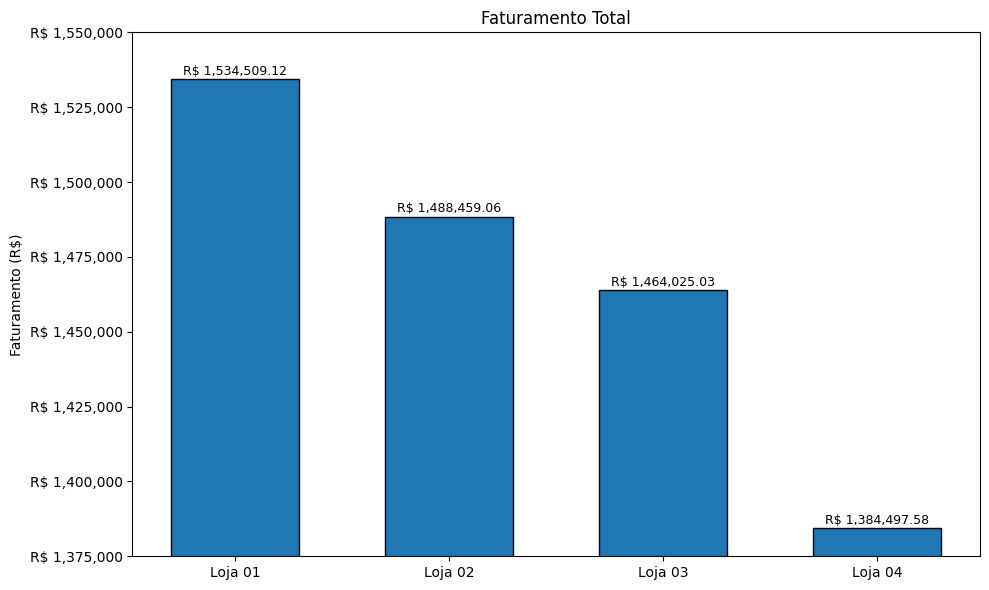

In [97]:
df = (
    pd.DataFrame.from_dict(faturamentos, orient="index", columns=["Faturamento"])
      .reset_index()
      .rename(columns={"index": "Loja"})
      .sort_values("Faturamento", ascending=False)
)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    df["Loja"],
    df["Faturamento"],
    width=0.6,
    color="#1f77b4",
    edgecolor="black"
)

step = 25000
ymin = int(np.floor(df["Faturamento"].min() / step) * step)
ymax = int(np.ceil(df["Faturamento"].max() / step) * step)
ax.set_ylim(ymin, ymax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(step))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))

ax.grid(False)
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + step * 0.015,
        f"R$ {h:,.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

ax.set_ylabel("Faturamento (R$)")
ax.set_title("Faturamento Total")

fig.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [98]:
mapa = {
    "Loja 01": "Loja 01",
    "Loja 02": "Loja 02",
    "Loja 03": "Loja 03",
    "Loja 04": "Loja 04"
}

for nome_loja, df_temp in vendas_loja_cat.groupby("loja"):
    rotulo = mapa.get(nome_loja, nome_loja)
    print(f"\nQuantidade de vendas por categoria — {rotulo}:")
    print(f"{'Categoria':<30}Quantidade")
    print("-" * 45)

    df_temp = df_temp.sort_values("Quantidade", ascending=False)
    for categoria, quantidade in zip(df_temp["Categoria do Produto"], df_temp["Quantidade"]):
        print(f"{categoria:<30}{quantidade} vendas")


Quantidade de vendas por categoria — Loja 01:
Categoria                     Quantidade
---------------------------------------------
moveis                        465 vendas
eletronicos                   448 vendas
brinquedos                    324 vendas
eletrodomesticos              312 vendas
esporte e lazer               284 vendas
instrumentos musicais         182 vendas
livros                        173 vendas
utilidades domesticas         171 vendas

Quantidade de vendas por categoria — Loja 02:
Categoria                     Quantidade
---------------------------------------------
moveis                        442 vendas
eletronicos                   422 vendas
brinquedos                    313 vendas
eletrodomesticos              305 vendas
esporte e lazer               275 vendas
instrumentos musicais         224 vendas
livros                        197 vendas
utilidades domesticas         181 vendas

Quantidade de vendas por categoria — Loja 03:
Categoria                    

# 3. Média de Avaliação das Lojas

---



In [100]:
def calcular_media_avaliacao(df_loja):
    """
    Calcula a média das avaliações na coluna 'Avaliação da compra'.
    Retorna 0 se não houver avaliações.
    """
    qtd = df_loja["Avaliação da compra"].count()
    soma = df_loja["Avaliação da compra"].sum()
    return (soma / qtd) if qtd > 0 else 0

medias = {
    "Loja 01": calcular_media_avaliacao(loja),
    "Loja 02": calcular_media_avaliacao(loja2),
    "Loja 03": calcular_media_avaliacao(loja3),
    "Loja 04": calcular_media_avaliacao(loja4)
}

for nome, media in medias.items():
    print(f"Média de avaliação da {nome}: {media:.2f}")

Média de avaliação da Loja 01: 3.98
Média de avaliação da Loja 02: 4.04
Média de avaliação da Loja 03: 4.05
Média de avaliação da Loja 04: 4.00


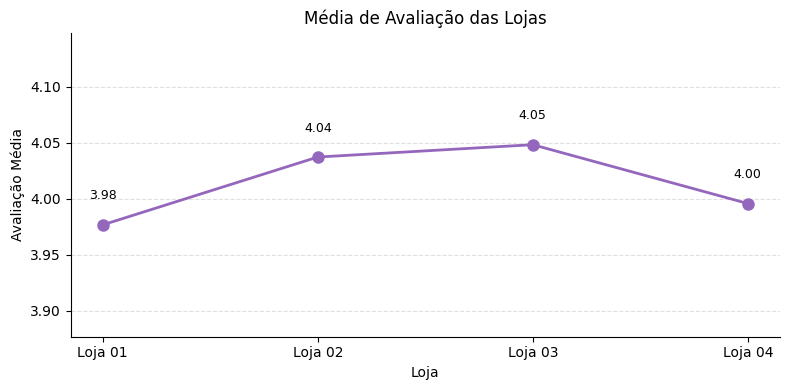

In [101]:
def calcular_media_avaliacao(df_loja):
    """
    Retorna a média da coluna 'Avaliação da compra'.
    Se não houver avaliações, retorna 0.
    """
    qtd = df_loja["Avaliação da compra"].count()
    soma = df_loja["Avaliação da compra"].sum()
    return (soma / qtd) if qtd > 0 else 0

medias = {
    "Loja 01": calcular_media_avaliacao(loja),
    "Loja 02": calcular_media_avaliacao(loja2),
    "Loja 03": calcular_media_avaliacao(loja3),
    "Loja 04": calcular_media_avaliacao(loja4)
}

df_medias = (
    pd.DataFrame.from_dict(medias, orient="index", columns=["Avaliação Média"])
      .reset_index()
      .rename(columns={"index": "Loja"})
)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    df_medias["Loja"],
    df_medias["Avaliação Média"],
    marker="o",
    linestyle="-",
    color="tab:purple",
    linewidth=2,
    markersize=8
)

for i, row in df_medias.iterrows():
    ax.text(
        row["Loja"],
        row["Avaliação Média"] + 0.02,
        f"{row['Avaliação Média']:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

min_av = df_medias["Avaliação Média"].min() - 0.1
max_av = df_medias["Avaliação Média"].max() + 0.1
ax.set_ylim(min_av, max_av)

ax.set_xlabel("Loja")
ax.set_ylabel("Avaliação Média")
ax.set_title("Média de Avaliação das Lojas")

ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [106]:
vendas_produto = (
    df_all
      .groupby(["loja", "Produto"])
      .size()
      .reset_index(name="Contagem")
)

for nome_loja, df_temp in vendas_produto.groupby("loja"):
    df_ord = df_temp.sort_values("Contagem", ascending=False).reset_index(drop=True)

    mais   = df_ord.loc[0]
    menos  = df_ord.loc[df_ord.index[-1]]

    print(f"\nLoja {nome_loja}:")
    print(f"  ► Mais vendido:  {mais['Produto']} ({mais['Contagem']} vendas)")
    print(f"  ► Menos vendido: {menos['Produto']} ({menos['Contagem']} vendas)")


Loja Loja 01:
  ► Mais vendido:  TV Led UHD 4K (60 vendas)
  ► Menos vendido: Headset (33 vendas)

Loja Loja 02:
  ► Mais vendido:  Iniciando em programação (65 vendas)
  ► Menos vendido: Jogo de tabuleiro (32 vendas)

Loja Loja 03:
  ► Mais vendido:  Kit banquetas (57 vendas)
  ► Menos vendido: Blocos de montar (35 vendas)

Loja Loja 04:
  ► Mais vendido:  Cama box (62 vendas)
  ► Menos vendido: Guitarra (33 vendas)


# 5. Frete Médio por Loja


In [119]:
def media_frete(df):
    return df["Frete"].mean()

fretes = {
    "Loja 01": media_frete(loja),
    "Loja 02": media_frete(loja2),
    "Loja 03": media_frete(loja3),
    "Loja 04": media_frete(loja4)
}

for nome, v in fretes.items():
    print(f"Frete médio da {nome}: R$ {v:.2f}")

Frete médio da Loja 01: R$ 34.69
Frete médio da Loja 02: R$ 33.62
Frete médio da Loja 03: R$ 33.07
Frete médio da Loja 04: R$ 31.28


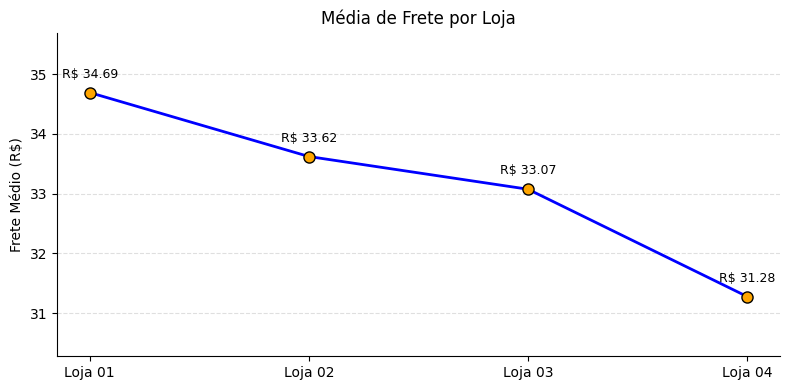

In [120]:
df_f = pd.DataFrame({
    "Loja": list(fretes.keys()),
    "Frete Médio": list(fretes.values())
})

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    df_f["Loja"],
    df_f["Frete Médio"],
    linestyle="-",
    marker="o",
    linewidth=2,
    color="blue",
    markerfacecolor="orange",
    markeredgecolor="black",
    markersize=8
)

for x, y in zip(df_f["Loja"], df_f["Frete Médio"]):
    ax.text(
        x, y + 0.2,
        f"R$ {y:.2f}",
        ha="center", va="bottom",
        fontsize=9
    )

min_y = df_f["Frete Médio"].min() - 1
max_y = df_f["Frete Médio"].max() + 1
ax.set_ylim(min_y, max_y)

ax.set_ylabel("Frete Médio (R$)")
ax.set_title("Média de Frete por Loja")

ax.grid(axis="y", linestyle="--", alpha=0.4)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

Após avaliar minuciosamente os indicadores de desempenho—onde a Loja 04 apresentou o menor faturamento e uma avaliação de clientes abaixo das demais—sugiro ao Sr. João que considere a venda da Loja 04, direcionando recursos para as unidades com resultados mais consistentes.